# Exploration Data Analysis of Airlines Tweets 

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

From this dataset, we will make the analysis about the reaction or the sentiment from the twitter user for the Airline and why they react like that.

# Import Library

In [51]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd 
import numpy as np 
import nltk 
nltk.download('stopwords')
#import nltk for natural language toolkit
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
import tqdm
#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word

import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fransd064180\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Dataset

In [216]:
data=pd.read_csv('tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


## Sentiment Proportion

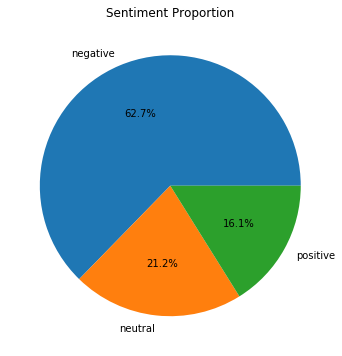

,airline_sentiment
negative,9082
neutral,3069
positive,2334


In [54]:
sentiment=pd.DataFrame(data['airline_sentiment'].value_counts())
plt.figure(figsize=(6,6))
plt.pie(sentiment,labels=sentiment.index, autopct='%1.1f%%')
plt.title('Sentiment Proportion')
plt.show()

sentiment


#### We see that the overall comments are negative. This may mean that you are generally unhappy with airline companies. However, this may also be due to the nature of twitter.

## Popularity Airline in Twitter

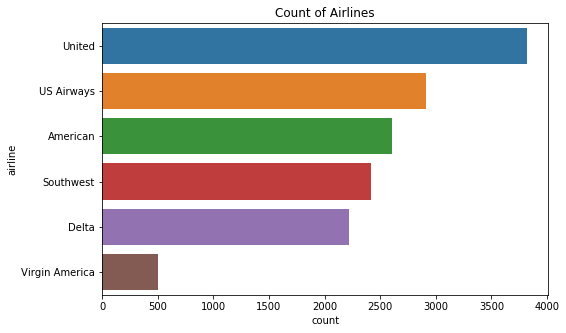

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(y=data['airline'], order=data['airline'].value_counts().index[:])
plt.title('Count of Airlines')
plt.show()

#### United airline is popular on Twitter. Of course, we don't know if this popularity is positive or negative. In addition, the fact that virgin america has very few twits gives the impression that the standard is neither good nor bad.

## Airline sentiments for each airline

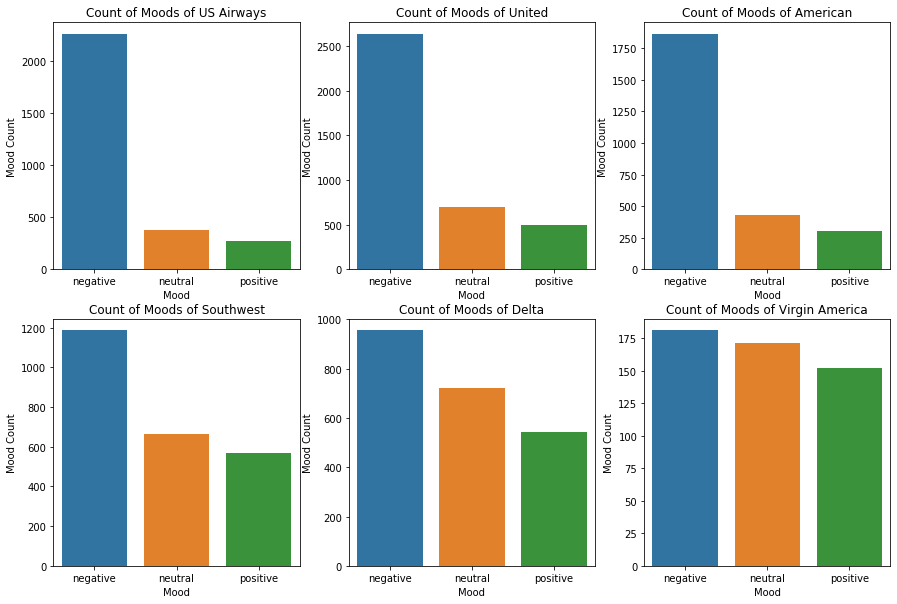

In [83]:
def plot_sub_sentiment(Airline):
    df=data[data['airline']==Airline]
    sns.countplot(df['airline_sentiment'],order=df['airline_sentiment'].value_counts().index[:])
    Index = [0,1,2]
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(15, 10))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)

plot_sub_sentiment('Virgin America')

#### The United airline mentioned above has a very bad reputation in twitter. They also have negative reviews, which can be said that The United airline,US Airways and American offer poor service and have very bad reputation..

1. United, US Airways, American substantially get negative reactions.
2. Tweets for Virgin America are the most balanced.

## What are the reasons for negative sentimental tweets for each airline ?

We will explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers

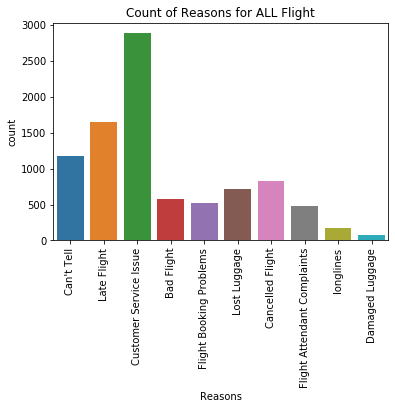

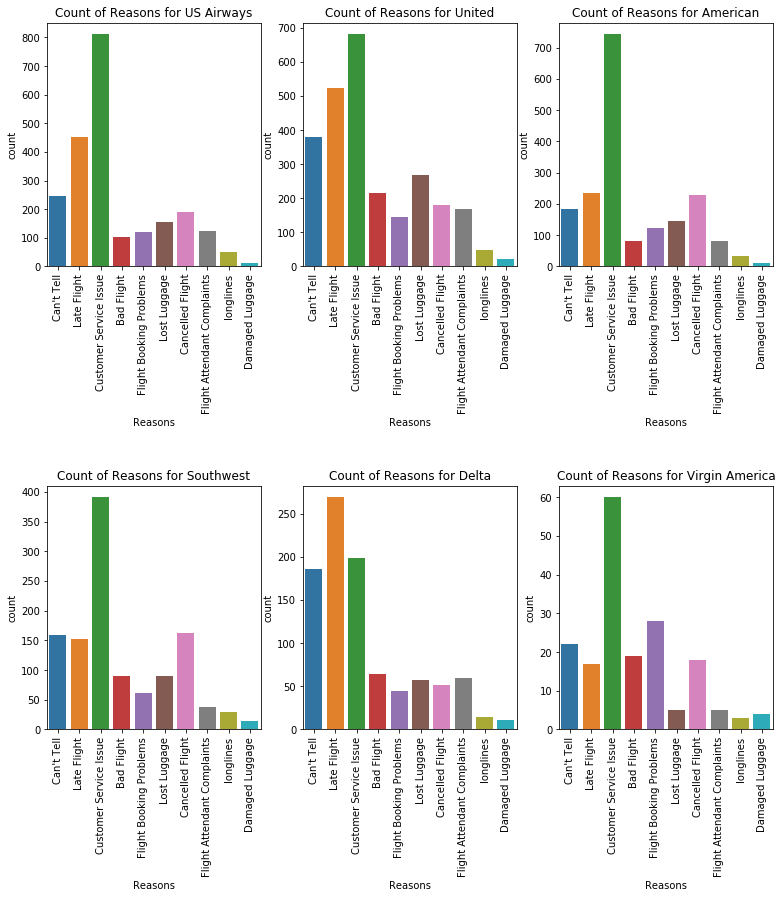

In [236]:
NR_Count=dict(data['negativereason'].value_counts(sort=False))

def NR_Count(Airline):
    if Airline=='All':
        df=data
    else:
        df=data[data['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(Airline):
    sns.barplot(x=NR_Count(Airline)['Reasons'],
                y=NR_Count(Airline)['count'],
                #order=list(NR_Count(Airline).sort_values('count',ascending=False)['Reasons'])
               )


    ##################### BarPlot Each Flight
plot_reason('All')
plt.xticks(rotation=90)
plt.title('Count of Reasons for ALL Flight')

f=plt.figure(figsize=(13,13))
f.add_subplot(2,3,1)
f.subplots_adjust(hspace=0.9)
plot_reason('US Airways')
plt.xticks(rotation=90)
plt.title('Count of Reasons for US Airways')

f.add_subplot(2,3,2)
f.subplots_adjust(hspace=0.9)
plot_reason('United')
plt.xticks(rotation=90)
plt.title('Count of Reasons for United')

f.add_subplot(2,3,3)
f.subplots_adjust(hspace=0.9)
plot_reason('American')
plt.xticks(rotation=90)
plt.title('Count of Reasons for American')

f.add_subplot(2,3,4)
f.subplots_adjust(hspace=0.9)
plot_reason('Southwest')
plt.xticks(rotation=90)
plt.title('Count of Reasons for Southwest')

f.add_subplot(2,3,5)
f.subplots_adjust(hspace=0.9)
plot_reason('Delta')
plt.xticks(rotation=90)
plt.title('Count of Reasons for Delta')

f.add_subplot(2,3,6)
f.subplots_adjust(hspace=0.9)
plot_reason('Virgin America')
plt.xticks(rotation=90)
plt.title('Count of Reasons for Virgin America')
plt.show()


1. Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
2. Late Flight is the main negative reason for Delta
3. Interestingly, Virgin America has the least count of negative reasons (all less than 60)
4. Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)

# Sentiment Analysis With WordCloud

## A. Preprocessing 

### A.1. Data Cleansing

In [183]:
#cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [184]:
# #apply function 
data['text'] = data['text'].progress_apply(preprocessing)

100%|██████████████████████████████████████████████████████████████████████████| 14485/14485 [00:07<00:00, 1967.11it/s]


### A.2. Preprocessing

In [186]:
#stopword 
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [187]:
#lematization 
data['text']  = data['text'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [188]:
#count sentiment 
sentiment = data.groupby(['airline_sentiment'])['airline_sentiment'].count()
sentiment

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['airline_sentiment']
chart.drop(['airline_sentiment'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()
chart

,airline_sentiment,tweet_count,percent
0,negative,9082,0.626993
1,neutral,3069,0.211874
2,positive,2334,0.161132


### A.2. Data Exploration

In [200]:
#define negative, positive, and neutral 
negative = data.loc[data['airline_sentiment'] == "negative"]['text']
positive  = data.loc[data['airline_sentiment'] == "positive"]['text']
neutral  = data.loc[data['airline_sentiment'] == "neutral"]['text']

In [205]:
#merge all the sentiment comments into one paragraph
all_description_negative = "".join(negative.values)
all_description_positive = "".join(positive.values)
all_description_neutral = "".join(neutral.values)

In [206]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Wordcloud of Negative Sentiment

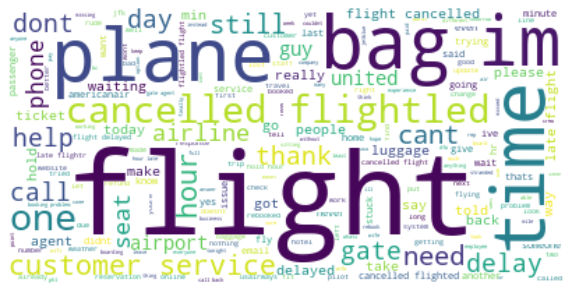

In [244]:
#negative 
plt.figure(figsize=(10,10))
create_word_cloud(all_description_negative)
plt.show()

We can see that the related words of Negative sentiment on the airplane are Flight, plane, cancelled, time. We can conclude that the passenger dislike the cancelled flight and Wasting Flight Time on the airplane

### Wordcloud of Positive Sentiment

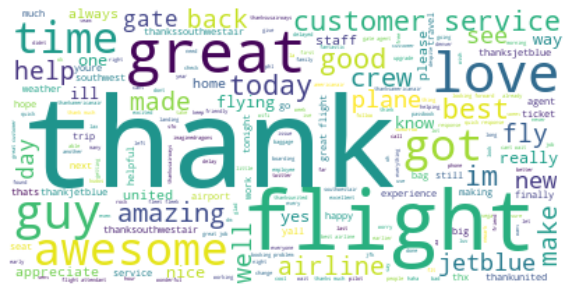

In [245]:
plt.figure(figsize=(10,10))
create_word_cloud(all_description_positive)
plt.show()

## Is there a relationship between negative sentiments and date ?

Our dataframe has data from 2015-02-17 to 2015-02-24

It will be interesting to see if the date has any effect on the sentiments of the tweets(especially negative !). We can draw various coclusions by visualizing this.

In [221]:
date = data.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

This shows the sentiments of tweets for each date from 2015-02-16 to 2015-02-24 for every airline in our dataframe.

Our next step will be to plot this and get better visualization for negative tweets.

### Time Series Plot by date each Airplane

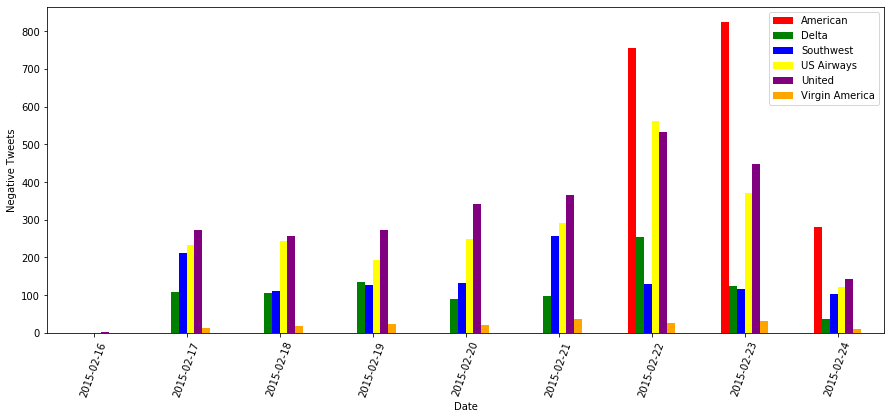

In [222]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

1. Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-22, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)

2. Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.

3. The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

# Thanks
Created by : 
Fransdana Nadeak